# Exploration data analysis 

This final project for CSCA5622 Introduction to machine learning: Supervised Learning. We are using data from UCI Machine Learning Repository ([UCI Repository](https://archive.ics.uci.edu/)). In this opportunity, we are using the dataset called 'Bank Marketing', the data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Dataset information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Variables tables

|Variable Name|Role|Type|Demographic|Description|Units|Missing Values|
|------------|----|----|-----------|-----------|------|---------------|
|age|	Feature|	Integer|	Age|	|	|	|no|
|job|	Feature|	Categorical|	Occupation|	type of job|	|	|no|
|marital|	Feature|	Categorical|	Marital Status|	marital status|		|no|
|education|	Feature|	Categorical|	Education Level|	|	|no|
|default|	Feature|	Binary|		|has credit in default?|		|no|
|balance|	Feature|	Integer|		|average yearly balance	euros|	 |no|
|housing|	Feature|	Binary|		|has housing loan?|	|	|no|
|loan|	Feature|	Binary|		|has personal loan?|	|	|no|
|contact|	Feature|	Categorical|	|	contact communication type|		|yes|
|day_of_week	|Feature|	Date|	|	last contact day of the week|	|no|
|month|	Feature|	Date|		|last contact month of year |	|	no|
|duration|	Feature|	Integer|		|last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|	|	no|
|campaign	|Feature	|Integer|	|	number of contacts performed during this campaign and for this client (numeric, includes last contact)|		|no|
|pdays	|Feature	|Integer|	|	number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)|		|yes|
|previous|	Feature|	Integer|	|	number of contacts performed before this campaign and for this client|	|	no|
|poutcome|	Feature|	Categorical|	|	outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')|	|	yes|
|y|	Target|	Binary|		|has the client subscribed a term deposit?|	|	no|


## Additional information

### Input variables:
  #### Bank client data:
   - **age** (numeric)
   - **job** : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   - **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   - **education** (categorical: "unknown","secondary","primary","tertiary")
   - **default**: has credit in default? (binary: "yes","no")
   - **balance**: average yearly balance, in euros (numeric) 
   - **housing**: has housing loan? (binary: "yes","no")
   - **loan**: has personal loan? (binary: "yes","no")
  #### Related with the last contact of the current campaign:
   - **contact**: contact communication type (categorical: "unknown","telephone","cellular") 
   - **day**: last contact day of the month (numeric)
   - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - **duration**: last contact duration, in seconds (numeric)
  #### Other attributes:
   - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   - **previous**: number of contacts performed before this campaign and for this client (numeric)
   - **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
   - **y** - has the client subscribed a term deposit? (binary: "yes","no")




# Project Summary

## Objective

The goal of this project is to build a classification model that predicts whether a customer will subscribe to a term deposit based on various features from the bank's marketing campaign data. The project will involve exploring and preprocessing the data, selecting relevant features, applying machine learning algorithms, and evaluating model performance using appropriate metrics. The final aim is to develop a robust model that helps the bank optimize its marketing efforts by targeting customers who are most likely to subscribe to a term deposit.


## Import libraries

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import *

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [2]:
# Join the feature dataset and the target dataset to start the exploratory data analysis
df = X.copy()
df['y'] = y
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
9311,42,blue-collar,married,secondary,no,-355,yes,yes,NaN,5,jun,939,6,-1,0,NaN,no
37730,43,technician,married,secondary,no,38,yes,no,cellular,14,may,273,1,-1,0,NaN,no
14198,36,technician,married,NaN,no,756,no,no,cellular,11,jul,396,3,-1,0,NaN,no


# Validation of null values and duplicates rows

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#Percentage of null values per column

print(df.isna().sum()/df.shape[0]*100)

age             0.000000
job             0.637013
marital         0.000000
education       4.107407
default         0.000000
balance         0.000000
housing         0.000000
loan            0.000000
contact        28.798301
day_of_week     0.000000
month           0.000000
duration        0.000000
campaign        0.000000
pdays           0.000000
previous        0.000000
poutcome       81.747805
y               0.000000
dtype: float64


We observe that in the dataset, the variables with the highest number of null values are the following:

- poutcome : 81.74%
- contact : 28.79
- education : 4.10%
- job : 0.63%

Therefore, we must define the strategy according to the context of each variable. For the categorical variables, poutcome, contact, education we will fill the empty fields with the category “unknown”, since the variable definition allows us to use that category when the data is unknown. For the job variable, we can have two strategies, either we delete the rows with empty fields, or we fill the fields with the fashion of the category, since the percentage of null values is very small, we will perform the second strategy.


In [5]:
df['poutcome'] = df['poutcome'].fillna('unknown')
df['contact'] = df['contact'].fillna('unknown')
df['education'] = df['education'].fillna('unknown')
df['job'] = df['job'].fillna(df['job'].mode().values[0])

In [6]:
print(df.isna().sum()/df.shape[0]*100)

age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
balance        0.0
housing        0.0
loan           0.0
contact        0.0
day_of_week    0.0
month          0.0
duration       0.0
campaign       0.0
pdays          0.0
previous       0.0
poutcome       0.0
y              0.0
dtype: float64


In [7]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y


We don't have duplicate values in the dataset. So we don't need to drop rows in this case.

# Statistical Analysis

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day_of_week,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Univariable analysis

## Categorical variables

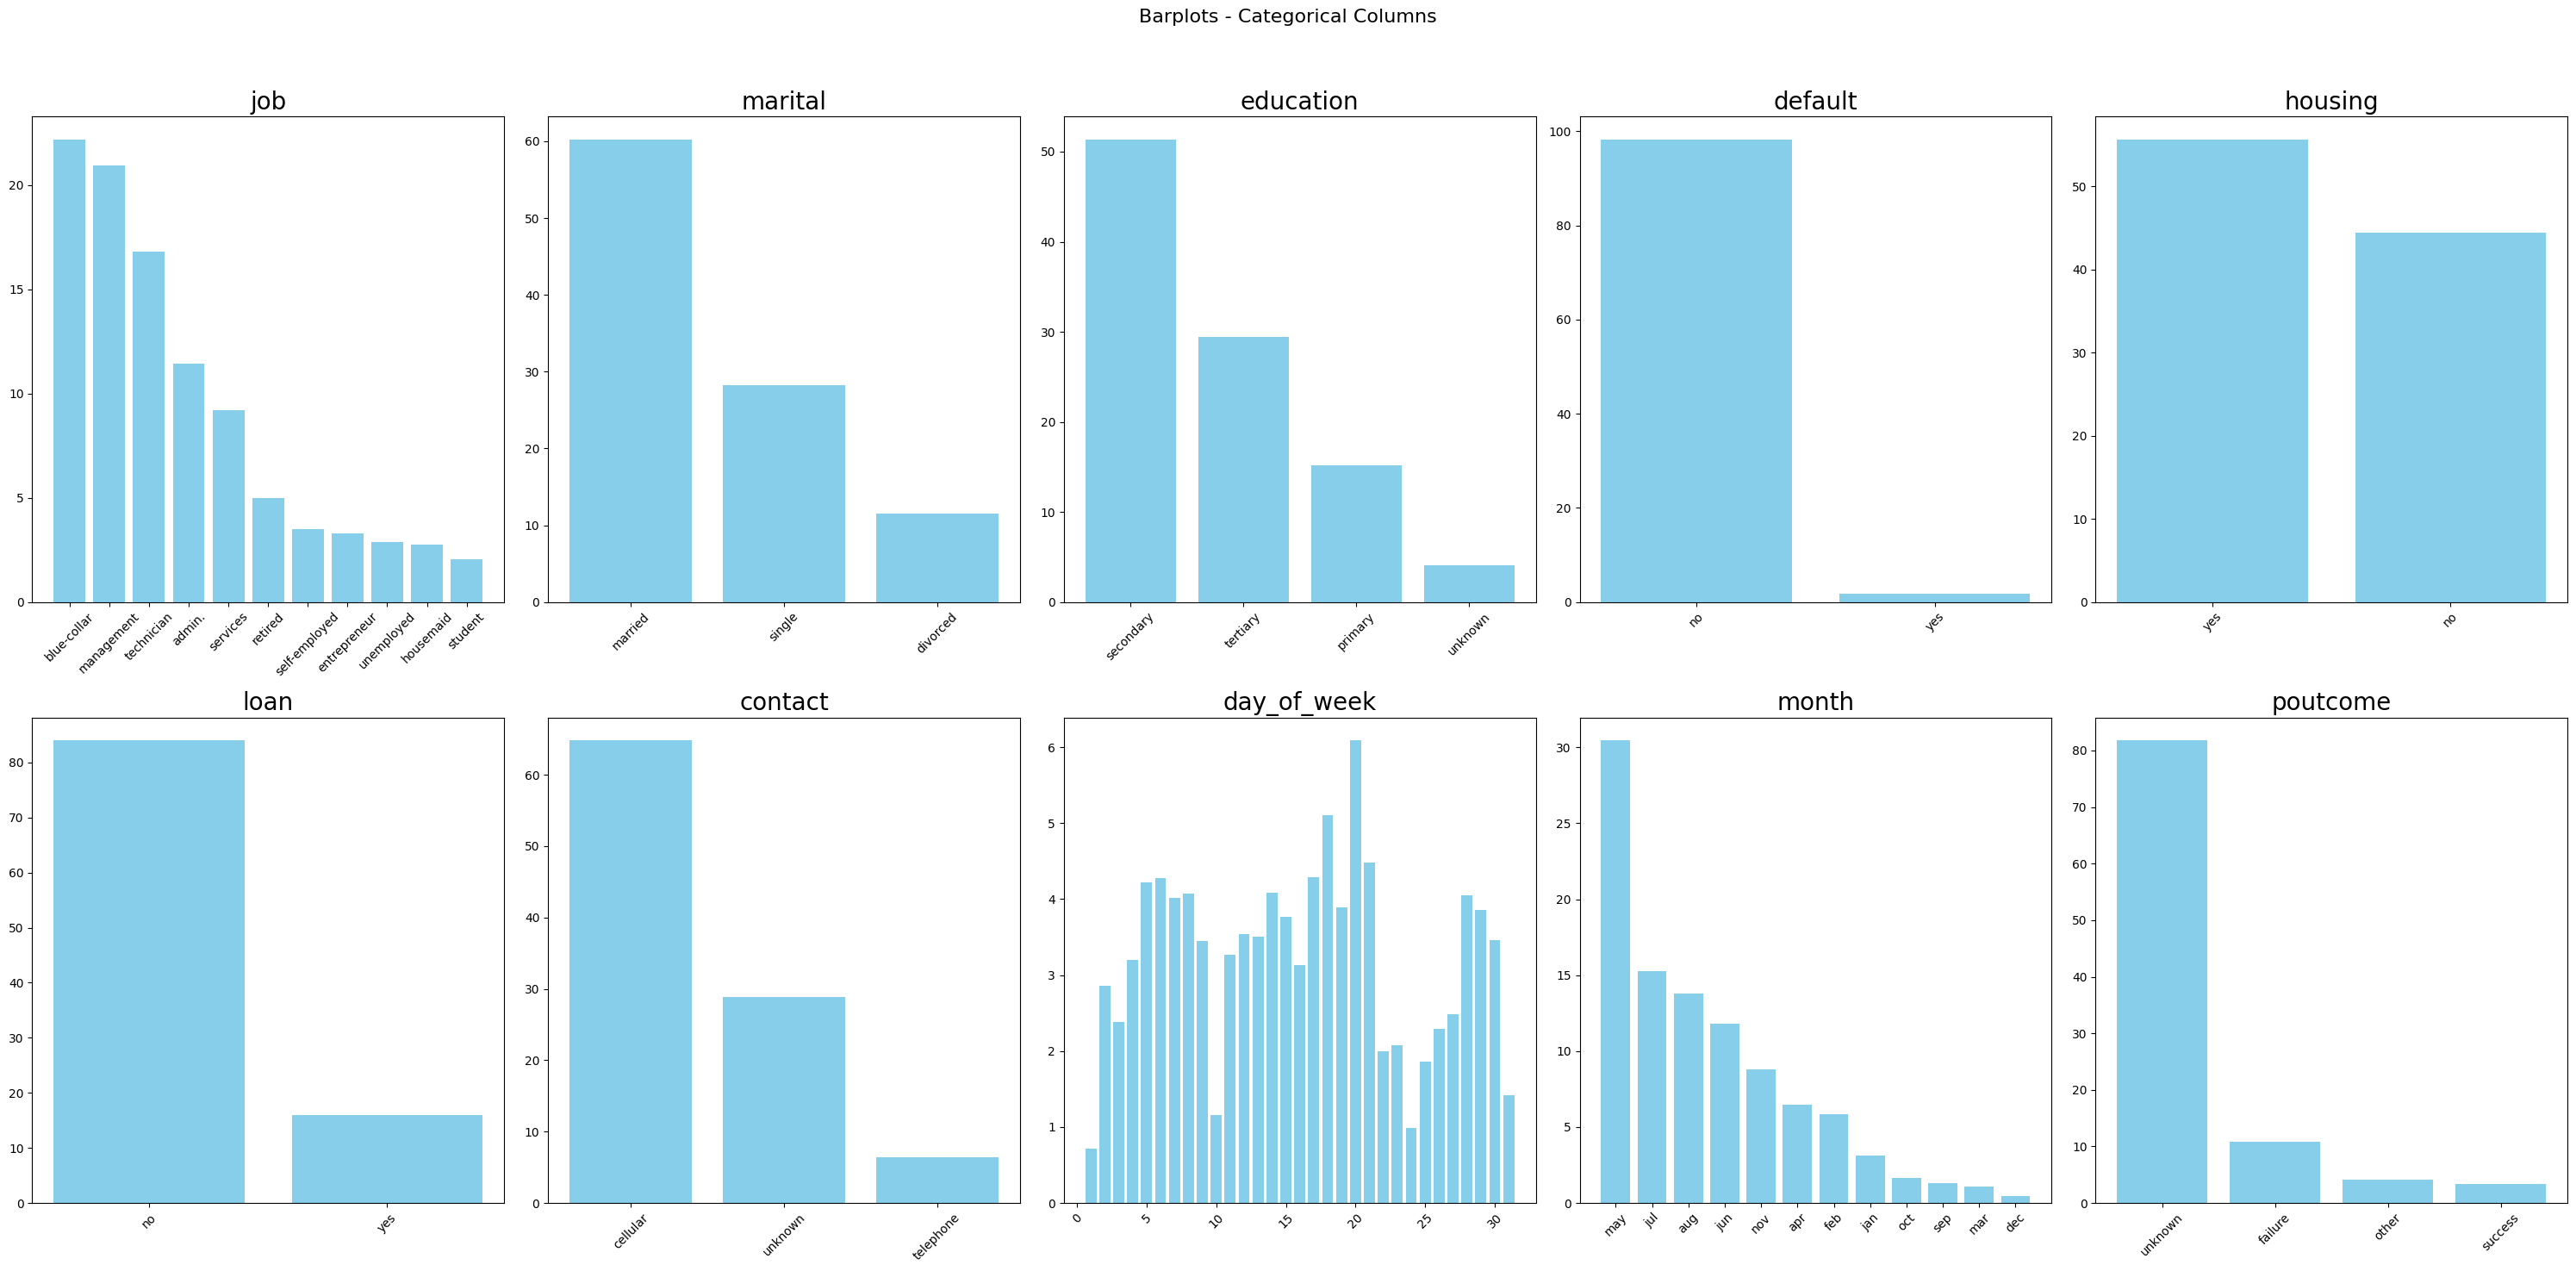

In [9]:
# Categorical variables
categorical_columns = ['job','marital','education','default','housing','loan','contact','day_of_week','month','poutcome']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 15), sharey=False)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each categorical column
for i, column in enumerate(categorical_columns):
    percentage = df[column].value_counts(normalize=True) * 100
    percentage_df = percentage.reset_index()
    percentage_df.columns = [column, 'Percentage']
    
    axes[i].bar(percentage_df[column], percentage_df['Percentage'], color='skyblue')
    axes[i].set_title(column, fontsize=20)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Add a main title
fig.suptitle("Barplots - Categorical Columns", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

In [10]:
df['y'].value_counts(normalize=True)*100

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

In [11]:
df['default'].value_counts(normalize=True)*100

default
no     98.197341
yes     1.802659
Name: proportion, dtype: float64

On this occasion, we observed that the “default” variable has very little variability (98% no, 1.8% yes). Therefore, we see that the information provided by the categorical variable is not very significant, and we could even consider deleting the variable when training the model. Therefore, we are going to delete this variable from the final dataset.

## Numerical variables

## Outliers

In [12]:
numerical_columns = df.select_dtypes([np.number]).columns.tolist()
print(numerical_columns)
numeric_statistics(data=df,numeric_columns=numerical_columns)

['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


,Variable,Median,Mean,Std. Deviation,Min. Value,Percentile 5,Percentile 10,Percentile 15,Percentile 20,Percentile 25,Percentile 50,Percentile 75,Percentile 80,Percentile 85,Percentile 90,Percentile 95,Percentile 99,Max. value
0,age,39.0,40.936210,10.618762,18,27.0,29.0,30.0,32.0,33.0,39.0,48.0,51.0,53.0,56.0,59.0,71.0,95
1,balance,448.0,1362.272058,3044.765829,-8019,-172.0,0.0,0.0,22.0,72.0,448.0,1428.0,1859.0,2539.0,3574.0,5768.0,13164.9,102127
2,day_of_week,16.0,15.806419,8.322476,1,3.0,5.0,6.0,7.0,8.0,16.0,21.0,24.0,27.0,28.0,29.0,31.0,31
3,duration,180.0,258.163080,257.527812,0,35.0,58.0,75.0,89.0,103.0,180.0,319.0,368.0,437.0,548.0,751.0,1269.0,4918
4,campaign,2.0,2.763841,3.098021,1,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,5.0,8.0,16.0,63
5,pdays,-1.0,40.197828,100.128746,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,102.0,185.0,317.0,370.0,871
6,previous,0.0,0.580323,2.303441,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,8.9,275


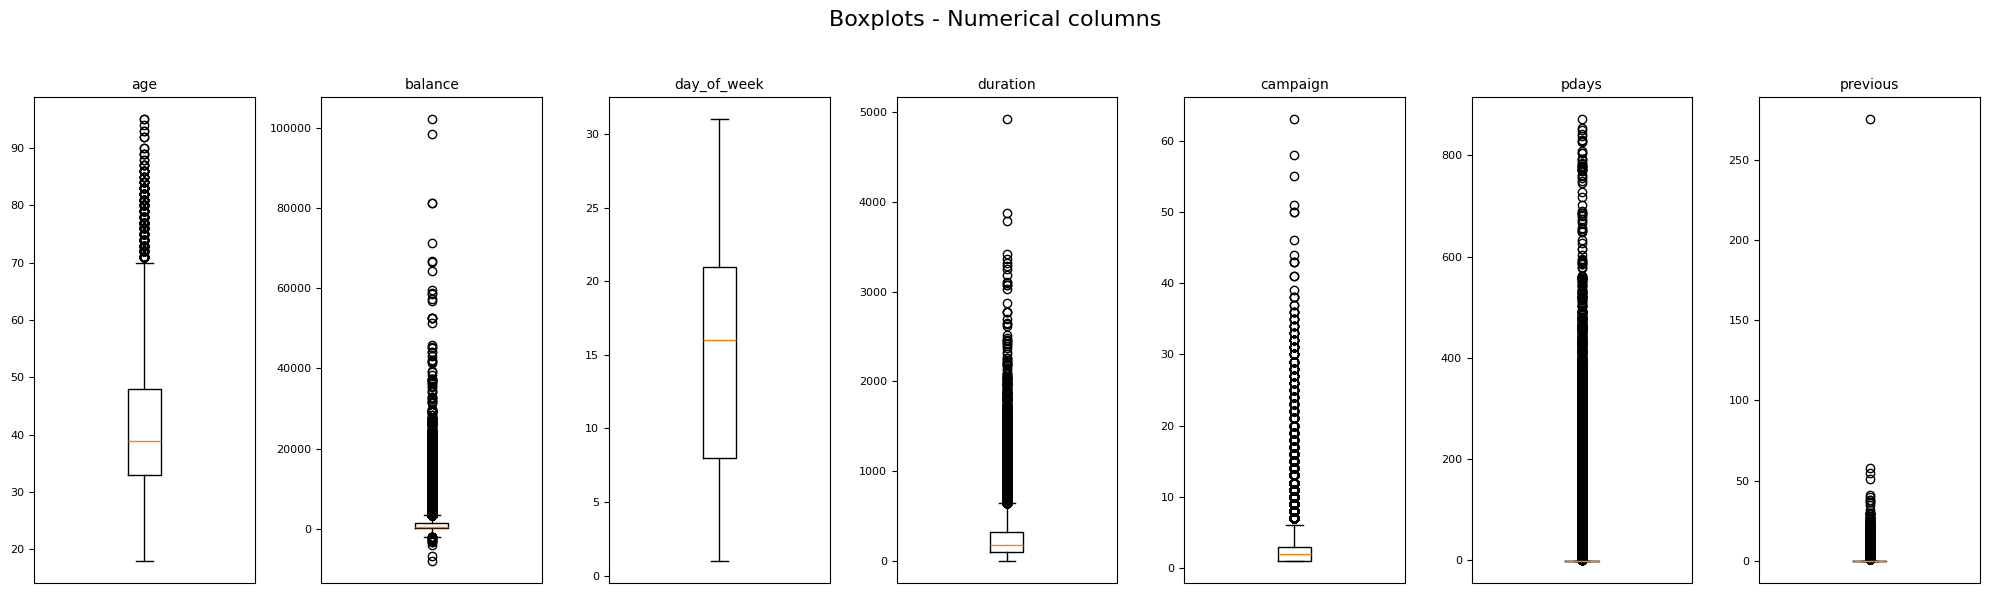

In [13]:
# Create subplots for each variable on its own scale
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 6), sharey=False)

# Plot each column separately
for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df[column], vert=True)
    axes[i].set_title(column, fontsize=10)
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axes[i].tick_params(axis='y', labelsize=8)

# Add a main title
fig.suptitle("Boxplots - Numerical columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

We can observe that in the variables age, balance, duration, campaign, pdays, previous we have outliers to identify. If we do not refine these values, we will not be able to have an optimal model that generalizes the results when tested with other populations or samples. On this occasion, we are going to use the winzor approach.

In [14]:
from scipy.stats.mstats import winsorize

outlier_columns = ['age','balance','duration','campaign','pdays','previous']
for col in outlier_columns:
    data = df[col].values
    winzorized_data = winsorize(data, limits=[0.05, 0.05])
    df[col] = winzorized_data

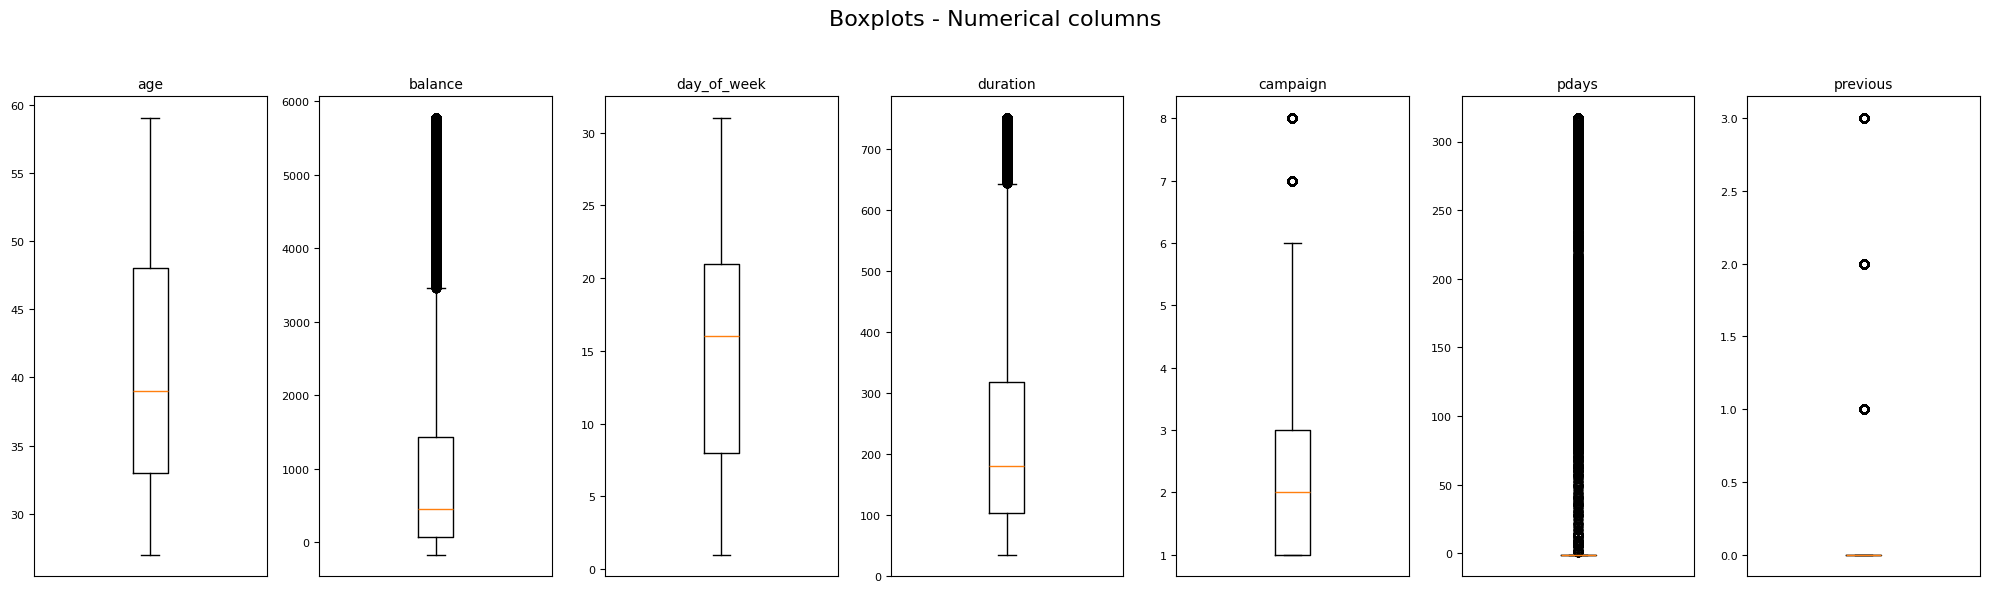

In [15]:
# Create subplots for each variable on its own scale
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 6), sharey=False)

# Plot each column separately
for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df[column], vert=True)
    axes[i].set_title(column, fontsize=10)
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axes[i].tick_params(axis='y', labelsize=8)

# Add a main title
fig.suptitle("Boxplots - Numerical columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

# Correlation Analysis

In this part, we start with the correlation analysis between the categorical and numerical variables with the target variable (**'y'**). To determine the correlation and interaction between the variables of the model and the target variable, with this we will be able to define which variables we will finally take in the model, since we will need to consider the variables that have more information and interaction with the target variable. Subsequently, we will review the interaction between numerical and categorical variables, to validate that there are no variables that give us a high interaction and may cause the model to take redundant variables. 

Analyzing age vs Target (y):


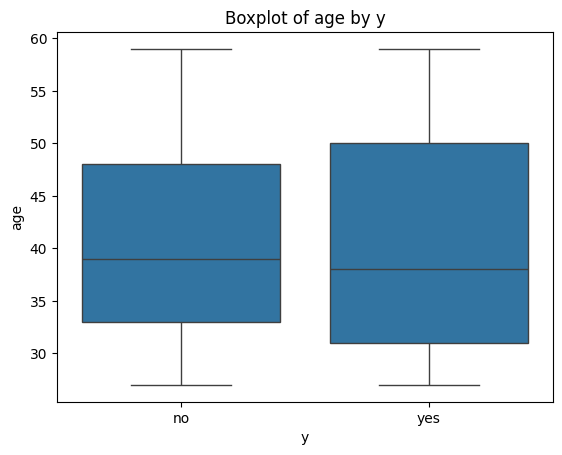

y=no: Mean=40.75, Std=9.51
y=yes: Mean=40.88, Std=10.99


Analyzing job vs Target (y):
Chi-square Test between job and y: p-value = 5.575427995540736e-172


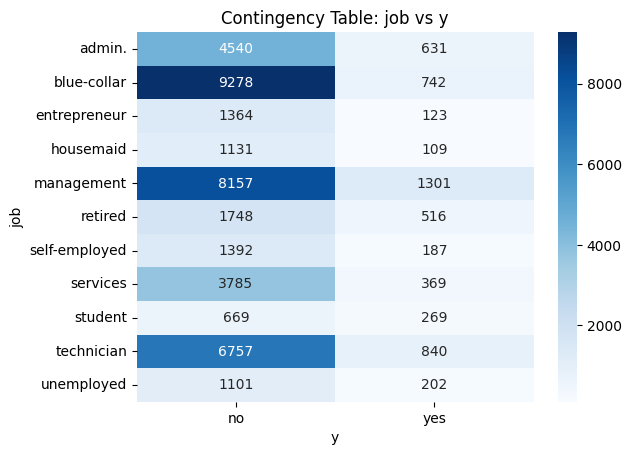

Analyzing marital vs Target (y):
Chi-square Test between marital and y: p-value = 2.1450999986791792e-43


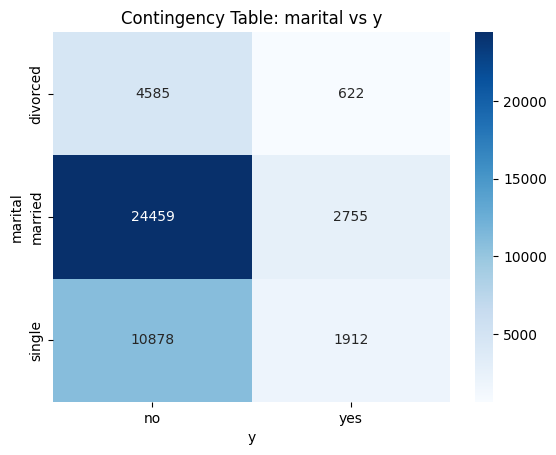

Analyzing education vs Target (y):
Chi-square Test between education and y: p-value = 1.6266562124072994e-51


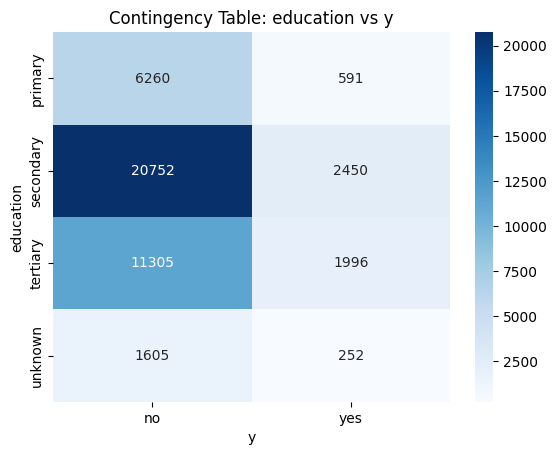

Analyzing default vs Target (y):
Chi-square Test between default and y: p-value = 2.4538606753508344e-06


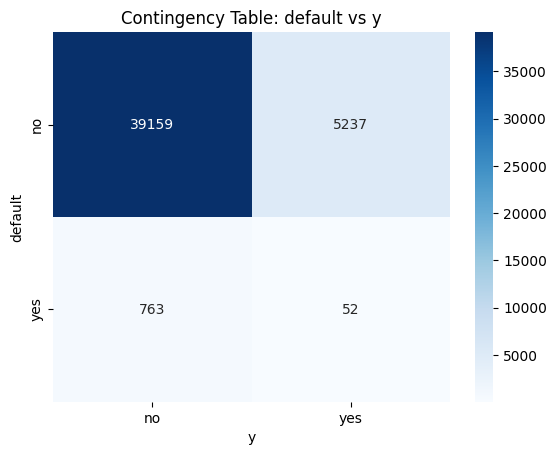

Analyzing balance vs Target (y):


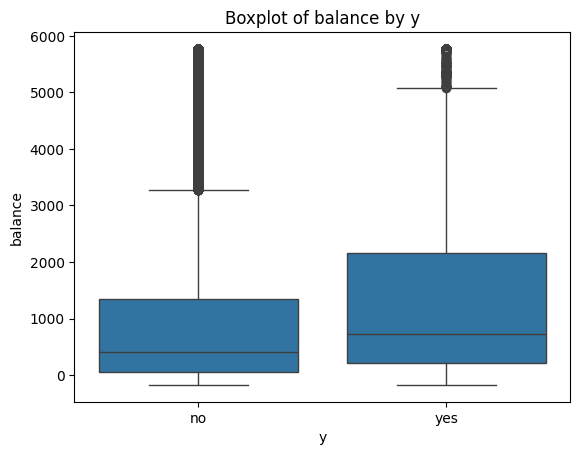

y=no: Mean=1070.83, Std=1556.99
y=yes: Mean=1465.41, Std=1714.48


Analyzing housing vs Target (y):
Chi-square Test between housing and y: p-value = 2.918797605076633e-192


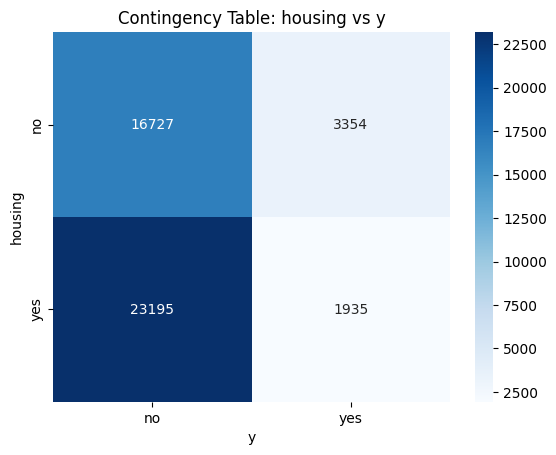

Analyzing loan vs Target (y):
Chi-square Test between loan and y: p-value = 1.665061163492756e-47


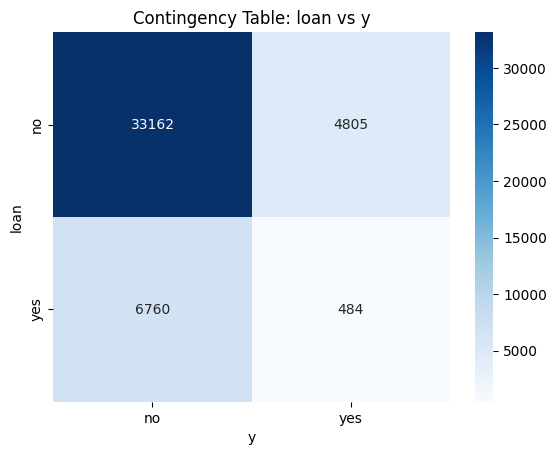

Analyzing contact vs Target (y):
Chi-square Test between contact and y: p-value = 1.251738325340638e-225


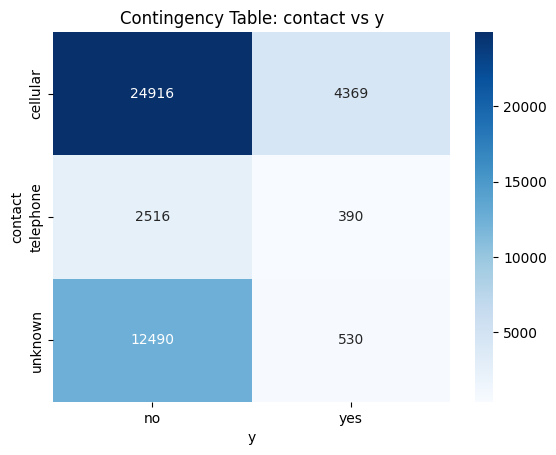

Analyzing day_of_week vs Target (y):


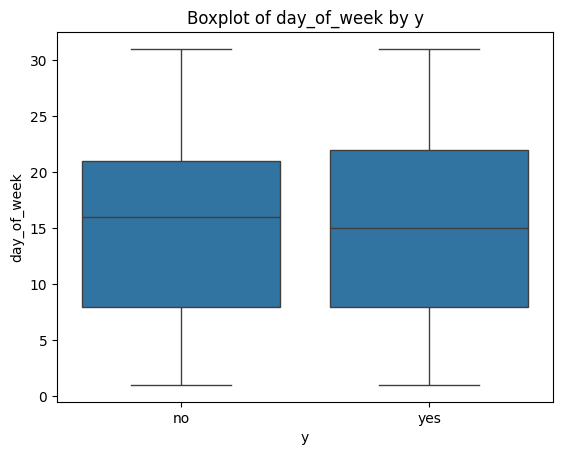

y=no: Mean=15.89, Std=8.29
y=yes: Mean=15.16, Std=8.50


Analyzing month vs Target (y):
Chi-square Test between month and y: p-value = 0.0


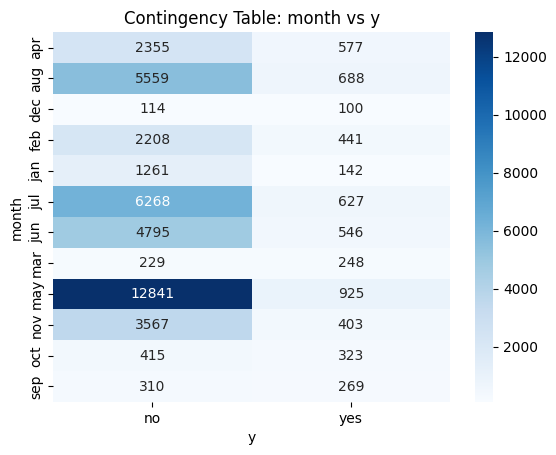

Analyzing duration vs Target (y):


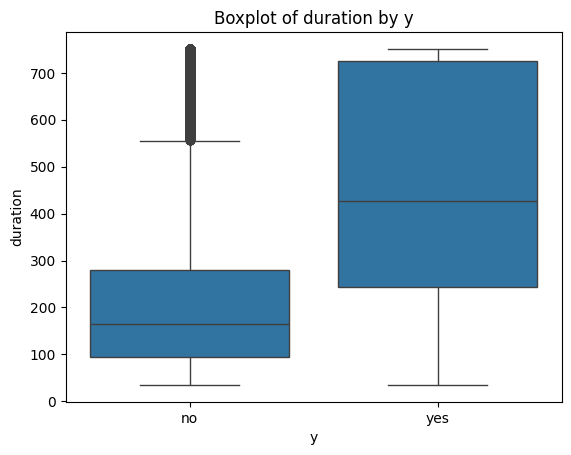

y=no: Mean=214.18, Std=167.40
y=yes: Mean=453.89, Std=228.83


Analyzing campaign vs Target (y):


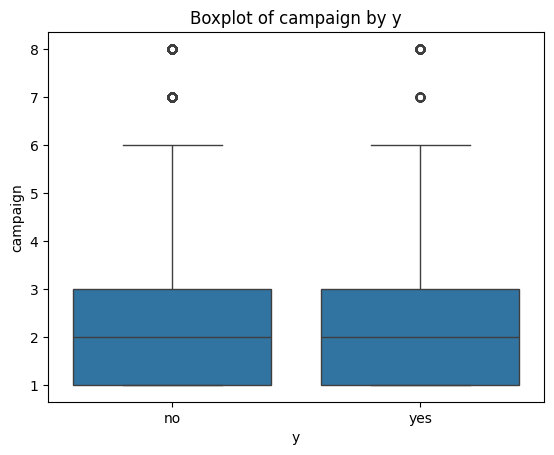

y=no: Mean=2.57, Std=1.94
y=yes: Mean=2.07, Std=1.53


Analyzing pdays vs Target (y):


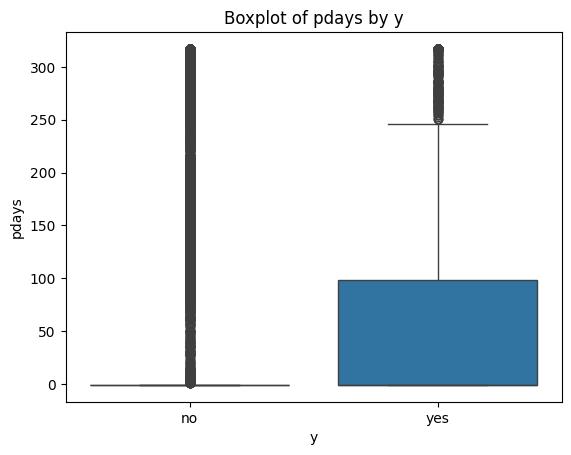

y=no: Mean=34.20, Std=88.50
y=yes: Mean=62.89, Std=99.87


Analyzing previous vs Target (y):


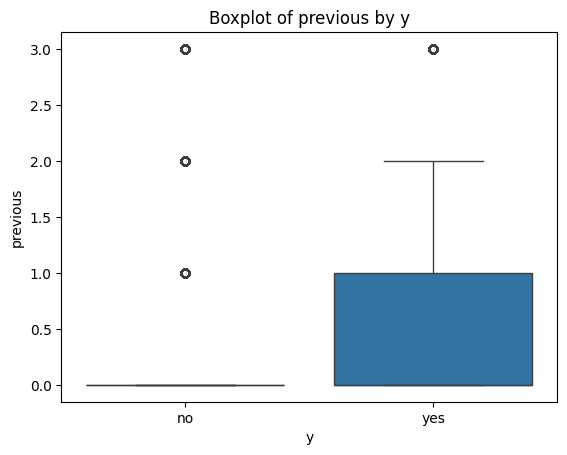

y=no: Mean=0.33, Std=0.82
y=yes: Mean=0.77, Std=1.15


Analyzing poutcome vs Target (y):
Chi-square Test between poutcome and y: p-value = 0.0


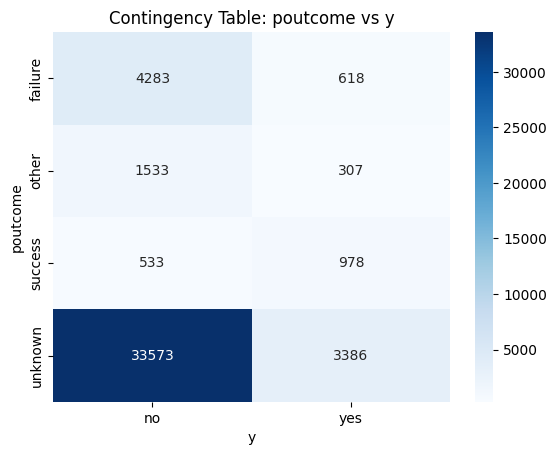

In [16]:
relationship_with_target(df=df)

With the observed results, we conclude that the “default” variable does not influence the “y” objective, so it may be detrimental to add a variable that does not contribute relevant information to the model. For the numerical variables we observe that in all variables there is a difference in the distribution between the categories of the target variable “y”. Therefore, we will keep all the numerical variables for the final dataset of the model.

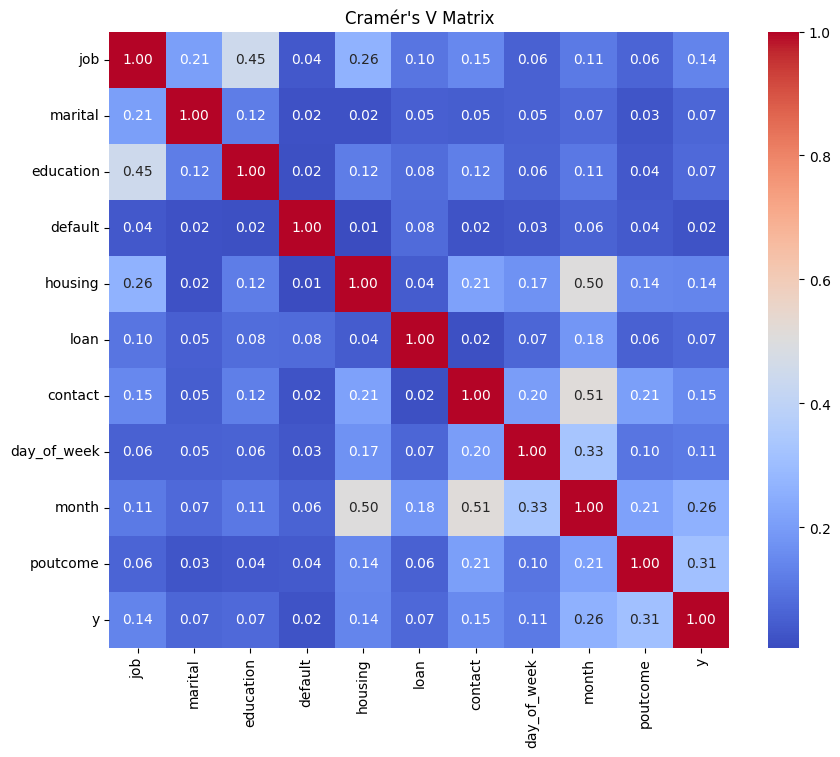

In [17]:
# Compute Cramér's V matrix
cramers_matrix = cramers_v_matrix(df, categorical_columns + ['y'])
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér's V Matrix")
plt.show()

In the cramer's matrix, we note that the categorical variables do not have a strong interaction between them, however we observe that the categorical variable poutcome, month are the variables with the highest correlation with the target 'y'.

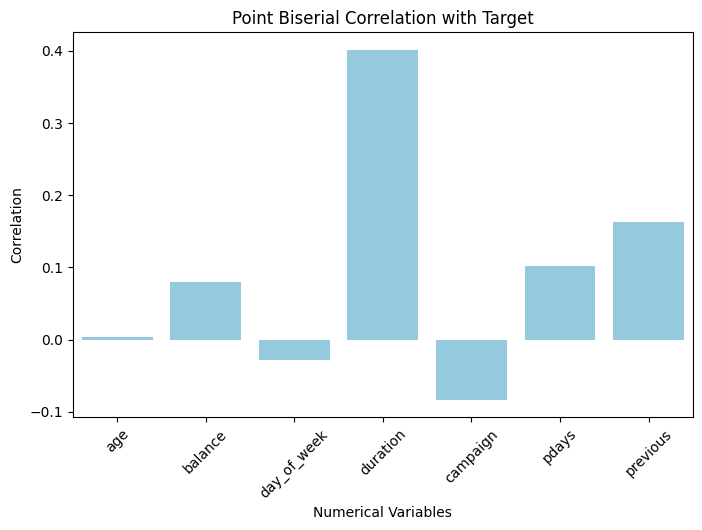

In [18]:
# Compute the matrix
biserial_matrix = point_biserial_matrix(df, numerical_columns, 'y')
plt.figure(figsize=(8, 5))
sns.barplot(x=biserial_matrix.index, y="Point Biserial Correlation", data=biserial_matrix.reset_index(), color='skyblue')
plt.xticks(rotation=45)
plt.title("Point Biserial Correlation with Target")
plt.ylabel("Correlation")
plt.xlabel("Numerical Variables")
plt.show()

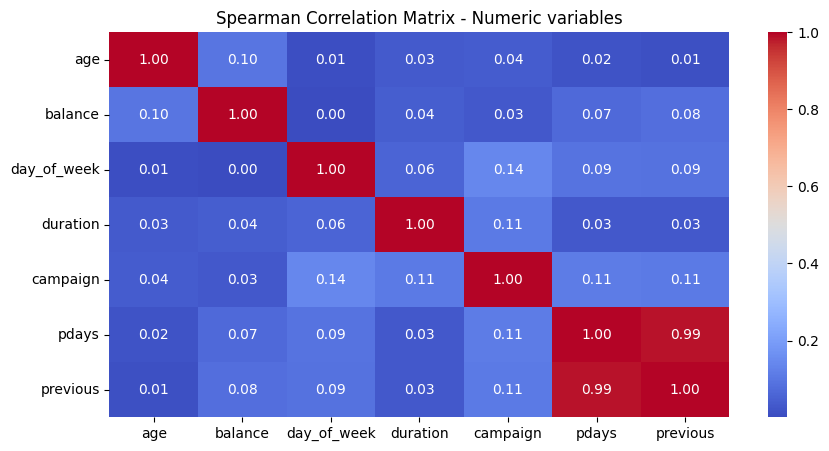

In [19]:
spearman_matrix = df[numerical_columns].corr(method='spearman').abs()
fig = plt.figure(figsize=(10,5))
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Spearman Correlation Matrix - Numeric variables')
plt.show()

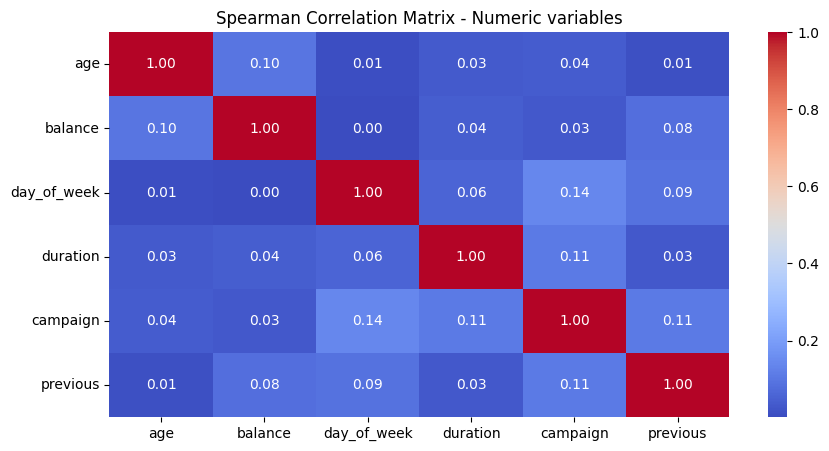

In [20]:
numerical_columns.remove('pdays')
spearman_matrix = df[numerical_columns].corr(method='spearman').abs()
fig = plt.figure(figsize=(10,5))
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Spearman Correlation Matrix - Numeric variables')
plt.show()

In the spearman correlation matrix between numerical variables, we notice that there is a very strong correlation between the variables 'pdays' and 'previous', which indicates that these variables together in a model can be counterproductive in the training of a model. Therefore, we can consider deleting one of the variables. 

Due to the results of the interaction analysis of each of the available variables with the target, we decided to delete the variable pdays because it maintains a very strong interaction with the target (check point biserial correlation with target). 

In [22]:
final_columns = categorical_columns + numerical_columns + ['y']
# print(final_columns)
final_dataset = df[final_columns].copy()
final_dataset.to_csv('./data/final_data.csv',sep='|',index=None)